In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
from IPython.display import Image
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定

In [4]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.keep100', '')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.5neg/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.ct0', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')

flags.DEFINE_string('op_name', 'words_importance', 'default is cosine sim importance or encoder_words_importance for maxpooling importance')
#flags.DEFINE_string('op_name', 'encoder_words_importance', 'default is cosine sim importance or encoder_words_importance for maxpooling importance')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text, text2=None, topn=0):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True)
  #print('text_ids', text_ids)
    
  if topn:
    #print(tf.get_default_graph().get_all_collection_keys())
    vocab = text2ids.vocab
    scores = predictor.inference('text_words_score', feed_dict = {'rnn/main/text:0': [text_ids]})
    #print(scores)
    scores = scores[0]
    indexes = (-scores).argsort()[:topn]
    print(' '.join(['%s:%.6f'%(gbk2utf8(vocab.key(index)), scores[index]) for index in indexes]))
    return
    
  #print(tf.get_collection('debug_seqeuence'))
  #x  =  predictor.inference(['debug_seqeuence'], index=0,
  #                                  feed_dict= {
  #                                    'rnn/main/text:0': [text_ids]
  #                                    })

  #print(x)
  #return
    
    
  if text2 is not None:
    text2 = utf82gbk(text2)
    text2_ids = text2ids.text2ids(text2, FLAGS.seg_method_, feed_single=True)
    score = predictor.inference('textsim', 
                                    feed_dict= {
                                      'rnn/main/text:0': [text_ids],
                                      'rnn/main/text2:0': [text2_ids]
                                      #'rnn/main/text2:0':[gezi.pad([1], 50)]
                                      })
    print(score[0], len(score[0]))
    return score[0]

  #seq_len = 50	


  #print('words', words)
  argmax_encode = predictor.inference([FLAGS.op_name], 
                                    feed_dict= {
                                      'rnn/main/text:0': [text_ids]
                                      })
  #print('argmax_encode', argmax_encode[0])
  

  argmax_encode = argmax_encode[0][0]
  #argmax_encode = [max(x, 0) for x in argmax_encode]

  #print('----', len(argmax_encode))

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True, append_start=True, append_end=True)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  #print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
    
  argmaxs = argmax_encode[:seq_len]
  #print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  total = sum([x for x in argmaxs if x > 0])
  y = [100.0*n/total for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  
  #for word, score in zip(words, y):
  #  print(word, score)
  
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.5neg/model.ckpt-97.3-124000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.5neg/model.ckpt-97.3-124000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.5neg/model.ckpt-97.3-124000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.5neg/model.ckpt-97.3-124000


In [6]:
def top_words(text, topn=100):
  return predict(text, topn=topn)

In [7]:
top_words('高铁')

铁:0.905976 钢轨:0.570334 tel:0.543579 行道:0.540681 着眼:0.538082 短发:0.535968 抑:0.534139 河西:0.532398 析:0.530976 诚鑫:0.530791 福兴:0.528143 关照:0.526000 优厚:0.525861 信赖:0.525630 耗:0.524706 纽罗宾:0.524682 flame:0.524526 大方:0.523722 腐朽:0.523636 恶霸:0.521895 开山:0.521764 吸水:0.520515 整齐:0.519855 薄荷:0.519760 遁形:0.519748 三泰:0.519390 喜来登:0.519343 除污:0.518632 稀世:0.518211 2600:0.518182 连云:0.517651 冷汗:0.517190 阳泉:0.516684 台风:0.516584 野蛮:0.515654 栅:0.514646 220:0.513666 沓:0.513646 荣誉:0.513610 亲人:0.512584 价目:0.512565 岁前:0.512081 www:0.511741 守时:0.511443 土方:0.511380 给出:0.510808 雅美娜来:0.510276 合婚:0.509715 贸:0.509420 身家:0.509227 播种:0.509081 油纸:0.508851 利空:0.508448 初期:0.508383 莆田:0.507907 托运:0.507535 对阵:0.507278 五台:0.507222 申诉:0.507139 94:0.507074 伤痕:0.506412 机手:0.506003 感悟:0.505991 圩:0.505889 成服:0.505750 文体:0.505355 黔:0.504958 江湾:0.504952 龙兴:0.504240 天水:0.504066 sir:0.503432 甚好:0.502367 做起:0.501659 世强:0.501480 河间:0.501448 cs:0.501126 臭虫:0.500868 通天下:0.500801 填报:0.500772 板凳:0.500751 广达:0.500506 1090:0.500483 烛:0.50012

In [8]:
top_words('墨镜')

墨镜:1.000000 重演:0.729463 得胜:0.719666 镜框:0.713259 祥宝:0.699222 孜:0.692039 月半:0.684566 圣兽:0.674521 斑点:0.668009 色调:0.667135 泻:0.662888 镜架:0.660571 达康:0.657898 雀斑:0.656875 010:0.656771 甜点:0.656757 威视:0.656617 偏光:0.655798 一两百:0.655068 家乡:0.655067 玉山:0.654676 松石:0.650973 道奇:0.650342 徐汇:0.649520 莲藕:0.647597 忻:0.647258 印章:0.647255 壮阔:0.645254 体贴:0.644008 三多:0.643041 水垢:0.641771 眼镜:0.640671 酸洗:0.639830 减压:0.639099 伊莎:0.636905 美沃:0.635966 挨宰:0.634618 神品:0.634318 积蓄:0.632335 瘀:0.631248 紫菜:0.630801 燕麦:0.630624 波澜:0.630365 5000000:0.630190 酒泉:0.630047 荷吉:0.628546 整容:0.625521 爸:0.625490 热切:0.624967 压器:0.624366 凉茶:0.624364 街口:0.622695 芦:0.622676 f1:0.622259 冰种:0.621703 大拿:0.621480 棒球:0.619991 31800:0.619911 馍:0.619228 碟:0.618395 槟:0.617981 稻:0.616292 大鹏:0.615722 羊脂:0.615709 肌肉:0.615577 万向:0.615090 离合:0.615067 回龙观:0.614705 洗漱:0.614591 防弹:0.614538 粑:0.614227 砧板:0.614116 辅佐:0.613671 依沃:0.613263 膦:0.613102 磷酸:0.612920 杰龙:0.612455 女方:0.611992 原配:0.611941 恒源:0.611426 微盟:0.611203 组成:0.610656 康特:0.609837 营利:0.

In [9]:
predict('墨镜', '墨镜')

[ 1.00000024] 1


array([ 1.00000024], dtype=float32)

In [10]:
predict('墨镜', '鼻子')

[ 0.2689541] 1


array([ 0.2689541], dtype=float32)

In [11]:
top_words('美女')

美女:1.000000 主播:0.539677 美白:0.524906 妹子:0.522474 女:0.475575 隐私:0.473821 色斑:0.466221 姐妹:0.465288 找出:0.459907 女神:0.455100 聚拢:0.450251 扩展:0.449906 妹:0.449605 脸部:0.447505 吊带:0.447077 清纯:0.445103 瘫:0.443987 姑娘:0.439536 染发:0.434833 恢弘:0.434047 韩式:0.432169 光速:0.430176 指尖:0.429885 晗:0.428179 照片:0.427922 萌萌:0.426125 华联:0.423882 染色:0.422760 全盛:0.422723 学医:0.421758 风韵:0.421432 爱美:0.420087 补气:0.419862 女孩:0.415829 孙俪:0.415661 窄:0.414266 领:0.413498 菲菲:0.412489 灵验:0.411182 萝:0.411173 国有:0.411162 她们:0.408821 睛彩:0.407934 异域:0.407025 好玩:0.406588 表姐:0.406165 单向:0.405736 褐斑:0.404968 上司:0.403817 眼见:0.403549 看茶:0.403157 大眼:0.401381 美丽:0.401295 仙:0.400916 愉:0.400816 特色:0.400567 着装:0.400125 裳:0.399918 情人:0.399381 拍照:0.399048 相亲:0.398885 独处:0.398262 化妆:0.398017 模范:0.397839 芙蓉:0.397765 超微:0.396889 学员:0.395130 旗袍:0.394396 此刻:0.394173 已婚:0.393501 异地:0.392509 竹笛:0.391951 高歌:0.391417 k歌:0.390573 今日:0.390077 做工:0.390016 一字:0.389412 买断:0.387781 整型:0.387451 情商:0.387076 欢腾:0.386772 脖:0.386463 嫣:0.385078 恋爱:0.384805 先考:0

iPhone隐藏功能：高铁也能在线选座了！


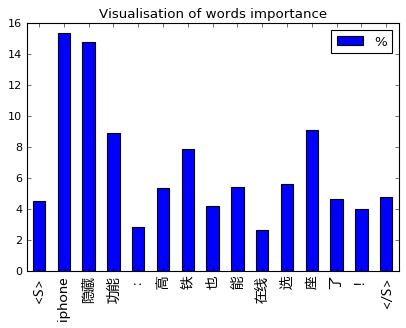

In [12]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

In [13]:
predict('iPhone隐藏功能：高铁也能在线选座了！', 'iPhone')

[ 0.59873027] 1


array([ 0.59873027], dtype=float32)

In [14]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁')

[ 0.30943349] 1


array([ 0.30943349], dtype=float32)

In [15]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁选座')

[ 0.40632933] 1


array([ 0.40632933], dtype=float32)

往返飞旧金山?真是赚了,我一直在这里买!


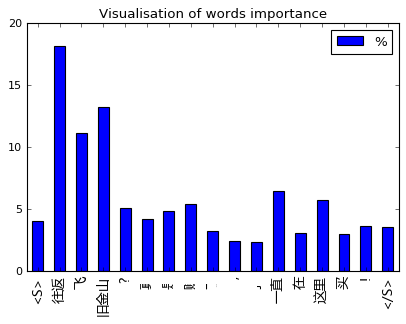

In [16]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

我的家乡惠州越来越热，选一款喜欢的墨镜很重要


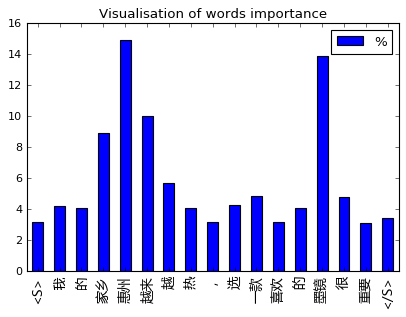

In [17]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要')

In [18]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要', '我的家乡惠州越来越热')

[ 0.70385993] 1


array([ 0.70385993], dtype=float32)

In [19]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要', '选一款喜欢的墨镜很重要')

[ 0.58154982] 1


array([ 0.58154982], dtype=float32)

In [20]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '我的家乡惠州越来越热')

[ 0.6560514] 1


array([ 0.6560514], dtype=float32)

In [21]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '选一款喜欢的墨镜很重要')

[ 0.71398628] 1


array([ 0.71398628], dtype=float32)

我的家乡越来越热，选一款喜欢的墨镜很重要


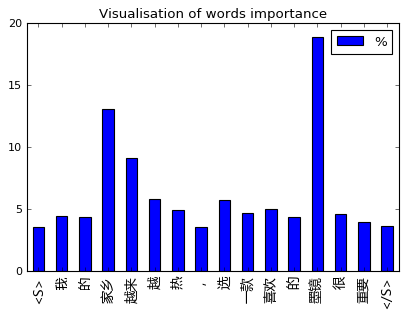

In [22]:
predict('我的家乡越来越热，选一款喜欢的墨镜很重要')

选一款喜欢的墨镜很重要，我的家乡越来越热


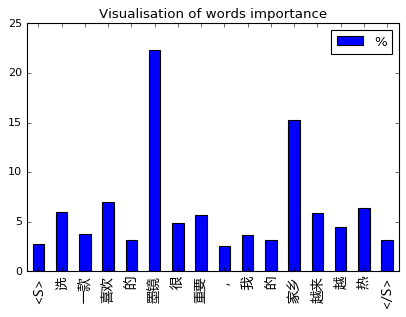

In [23]:
predict('选一款喜欢的墨镜很重要，我的家乡越来越热')

选一款喜欢的墨镜很重要


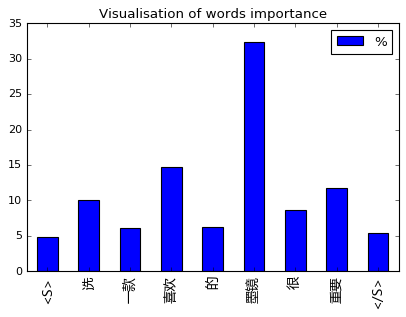

In [24]:
predict('选一款喜欢的墨镜很重要')

不要住酒店，这里的民宿好


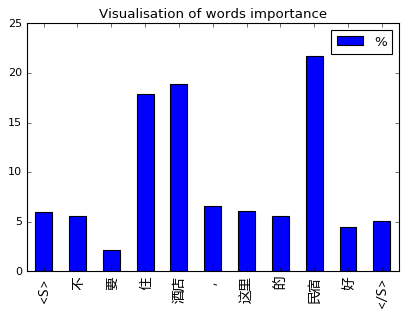

不要住民宿，这里的酒店好


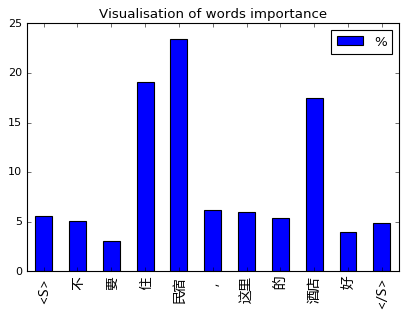

In [25]:
predict('不要住酒店，这里的民宿好')
predict('不要住民宿，这里的酒店好')

In [26]:
top_words('酒店')

酒店:1.000000 一世:0.546497 roy:0.526485 订房:0.504509 小青:0.484724 软包:0.483285 loft:0.478351 判别:0.477489 歌厅:0.477446 海选:0.476945 展台:0.470450 altea:0.470031 简化:0.465664 学时:0.463186 穆:0.462359 墙壁:0.461080 流水:0.458554 城内:0.456886 桌子:0.456221 799:0.453973 吃吃:0.453801 徽派:0.453690 雅洁:0.453140 功底:0.452226 电建:0.451920 旅店:0.451142 喷墨:0.450937 隔层:0.445988 得闲:0.444234 麦琪:0.443725 康体:0.442966 恒宇:0.438844 亲近:0.438154 玛特:0.437705 天亿:0.436748 斯维特:0.434207 蒸:0.433671 困扰:0.431936 云霞:0.430936 双井:0.430221 卡龙:0.427908 收买:0.427814 硬盘:0.427244 广大:0.426485 诚心:0.425908 大班:0.425473 万汇:0.425299 雅韵:0.424996 异军:0.424991 红外:0.424463 永和:0.424091 浓厚:0.423464 日夜:0.423207 列师:0.422964 罗帝:0.421719 复检:0.421558 隔震:0.421537 烀:0.421120 珩:0.420634 火光:0.420561 去:0.420352 筑造:0.420151 包围:0.419723 说到:0.418828 游艇:0.418178 墙板:0.418071 软膜:0.417714 柜体:0.415332 泺:0.415121 市内:0.414888 汾:0.413306 博达:0.412478 帘:0.411847 相比:0.411253 透漏:0.411057 萝岗:0.411001 495:0.410629 日坛:0.410271 永春:0.410257 稀:0.410062 拆掉:0.409783 职工:0.409283 阿香:0.409216 万泰:0

In [27]:
top_words('新加坡')

新加坡:1.000000 创汇:0.659164 马来西亚:0.643738 碰撞:0.634365 电厂:0.631802 渔具:0.619539 除虫:0.618592 百利来:0.615497 107:0.615245 吸氧:0.611241 围城:0.608847 多分:0.608232 午夜:0.606322 何以:0.603655 洋溢:0.600505 钢牙:0.599035 剖析:0.597536 海亚:0.596198 189:0.595861 先施:0.593999 攀枝花:0.593894 创兴:0.593534 作文:0.592877 吉通:0.590508 过山:0.586539 成型:0.586097 东京:0.580770 刺刀:0.577240 niit:0.574880 谢:0.574617 堤:0.573468 珠子:0.572950 浩瀚:0.572687 亚太:0.572666 干部:0.572609 热力:0.572145 宫殿:0.571919 新都:0.569873 克兰斯:0.569385 昊天:0.568994 免去:0.568570 矿物:0.568361 十多万:0.567963 智力:0.567578 租约:0.567149 江华:0.567119 年产:0.566915 大名:0.565854 欺:0.563523 五色:0.563506 功劳:0.563434 凯益:0.562665 考场:0.562600 凝结:0.562380 旗云:0.562009 纯玩:0.561765 宝林:0.561509 邂逅:0.560799 诺菲德:0.560556 钰:0.559350 惠阳:0.559344 愿:0.557936 大梁:0.557320 希柯:0.556895 结晶:0.555025 维持:0.553255 创出:0.552821 电量:0.552534 也有:0.552269 立森:0.551737 呈:0.551456 出水:0.551244 摇臂:0.549836 字号:0.549426 二十二:0.549229 曦:0.548253 渔人:0.548063 面具:0.547994 薏:0.547706 隆盛:0.547622 客人:0.547595 6888:0.547282 开勒:0.5469

In [28]:
top_words('民宿')

民宿:1.000000 远洋:0.643849 套房:0.633358 免交:0.590931 逐:0.578251 赏:0.570621 富人:0.563331 顺达:0.562811 西昌:0.562244 阳台:0.554600 监:0.550660 奥兰多:0.548264 绝佳:0.542908 贰:0.537043 59800:0.536998 佛罗里达:0.534864 精装:0.534756 节约:0.533810 利益:0.529327 渗水:0.529107 富丽:0.527760 擎天:0.525457 公寓:0.522927 远安:0.517498 瘾:0.514267 住宿:0.513988 全线:0.512770 房:0.511052 木屋:0.509328 艳遇:0.508690 荔湾:0.508031 大戏:0.507360 乔治:0.505074 装出:0.503236 毕竟:0.501377 新海:0.500002 房子:0.499177 打拼:0.498751 雪山:0.498459 美妙:0.498191 菠萝格:0.497488 密室:0.497138 上涨:0.496852 腾锋:0.494831 醒:0.491126 添福:0.490961 loft:0.489990 途:0.489926 房东:0.488980 人性:0.487999 康体:0.485142 框:0.484764 灸:0.484670 正统:0.484239 四房:0.482865 厦门:0.478515 远大:0.478420 小城:0.478334 东芝:0.478230 大海:0.477546 玻化:0.475483 荤:0.474572 晟泰:0.473987 一房:0.473466 客房:0.472988 天亿:0.472521 就医:0.470812 轮机:0.470766 小镇:0.470357 示:0.469633 香河:0.469328 院子:0.469319 选房:0.468766 活到:0.468386 湖:0.468371 通州:0.467714 城内:0.466688 小区:0.466623 阴凉:0.466602 稀:0.466458 雨棚:0.466443 垦:0.466381 招收:0.465739 这份:0.46400

In [29]:
top_words('酒店')

酒店:1.000000 一世:0.546497 roy:0.526485 订房:0.504509 小青:0.484724 软包:0.483285 loft:0.478351 判别:0.477489 歌厅:0.477446 海选:0.476945 展台:0.470450 altea:0.470031 简化:0.465664 学时:0.463186 穆:0.462359 墙壁:0.461080 流水:0.458554 城内:0.456886 桌子:0.456221 799:0.453973 吃吃:0.453801 徽派:0.453690 雅洁:0.453140 功底:0.452226 电建:0.451920 旅店:0.451142 喷墨:0.450937 隔层:0.445988 得闲:0.444234 麦琪:0.443725 康体:0.442966 恒宇:0.438844 亲近:0.438154 玛特:0.437705 天亿:0.436748 斯维特:0.434207 蒸:0.433671 困扰:0.431936 云霞:0.430936 双井:0.430221 卡龙:0.427908 收买:0.427814 硬盘:0.427244 广大:0.426485 诚心:0.425908 大班:0.425473 万汇:0.425299 雅韵:0.424996 异军:0.424991 红外:0.424463 永和:0.424091 浓厚:0.423464 日夜:0.423207 列师:0.422964 罗帝:0.421719 复检:0.421558 隔震:0.421537 烀:0.421120 珩:0.420634 火光:0.420561 去:0.420352 筑造:0.420151 包围:0.419723 说到:0.418828 游艇:0.418178 墙板:0.418071 软膜:0.417714 柜体:0.415332 泺:0.415121 市内:0.414888 汾:0.413306 博达:0.412478 帘:0.411847 相比:0.411253 透漏:0.411057 萝岗:0.411001 495:0.410629 日坛:0.410271 永春:0.410257 稀:0.410062 拆掉:0.409783 职工:0.409283 阿香:0.409216 万泰:0

In [30]:
top_words('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

惠州:0.546898 加币:0.533620 讯通:0.525739 程度:0.500765 580:0.492294 鱼饵:0.491905 滇:0.482841 温泉:0.479130 重演:0.475388 警官:0.471011 墨镜:0.468743 降温:0.467051 开到:0.465488 丁蜀:0.462373 离岸:0.459916 全境:0.459478 一德:0.458515 吃药:0.454994 桑尼:0.452189 桂林:0.451926 中企:0.451408 电量:0.451385 水壶:0.450866 肥肉:0.450071 舰队:0.449905 市内:0.449424 扎堆:0.449175 对象:0.448342 生根:0.444485 垂钓:0.443281 福鼎:0.440693 神盾:0.440121 荒岛:0.438400 水体:0.437973 肉片:0.437224 莅临:0.436912 气色:0.435582 透支:0.435517 长阳:0.435424 酒窝:0.435422 嵘:0.434208 奢华:0.433438 谴:0.433370 加大:0.433041 异域:0.432719 转弯:0.432115 佳酿:0.432036 热力:0.431701 转折:0.430819 翻领:0.430438 还贷:0.430348 从化:0.429785 爱帝:0.429074 红石:0.428648 万户:0.428044 抵扣:0.427987 轮式:0.425873 要领:0.424562 寒潮:0.422943 鸦:0.422287 吉之:0.421990 阿慕施:0.421177 保镖:0.419978 首府:0.419557 panda:0.419447 防霉:0.419059 power:0.418686 磕:0.418057 一两千:0.417895 特氟龙:0.416182 依视路:0.415982 2013:0.415901 后果:0.415315 色调:0.415236 老掉牙:0.414947 统领:0.414777 小户:0.414465 31800:0.414362 放话:0.413488 大鹏:0.413240 低龄:0.413076 海龟:0.412359 天松:0

In [31]:
top_words('选一款喜欢的墨镜很重要')

墨镜:0.655353 紫苏:0.540259 胶片:0.529658 市内:0.511423 潼关:0.511203 滇:0.506472 遥:0.506321 圣兽:0.503873 置办:0.503445 血饮:0.502871 凉茶:0.502450 大拿:0.502179 离合:0.501201 内向:0.500760 镜框:0.498371 只待:0.497582 祥宝:0.496368 整容:0.495686 麦克:0.495386 松石:0.493143 蒂凡利普:0.492414 天辰:0.492327 满脸:0.492200 蓓蕾:0.491712 袖:0.491630 一百:0.491251 扰:0.490595 燕麦:0.490561 洗漱:0.490348 稻:0.490183 取水:0.488869 粑:0.488059 重演:0.487070 加币:0.486930 碧仁:0.486492 傅:0.486237 砧板:0.486080 脖:0.485587 五龙:0.485191 鼻腔:0.484936 人头:0.483494 程度:0.483009 达康:0.482670 沃森:0.482107 威视:0.481952 010:0.481766 千年:0.481501 相看:0.481226 寻物:0.480361 段子:0.480345 擦布:0.480055 笔挺:0.480055 美沃:0.479470 女方:0.479459 吃药:0.479258 雀斑:0.479213 拉带:0.478539 瓷壶:0.478272 瀑:0.477804 紫菜:0.477450 杰龙:0.477377 紧迫:0.476698 891:0.476616 百货:0.476200 强效:0.475934 争相:0.475192 娜芙:0.475116 水库:0.474378 波澜:0.474000 水垢:0.473874 眼影:0.473363 警报:0.473328 甜点:0.473243 moba:0.473162 机体:0.472780 玛瑞莎:0.472661 相投:0.472014 注入:0.471341 嵘:0.471270 日新:0.470897 益寿:0.470344 神品:0.469982 街口:0.469886 可好:0.46